# Linear classification

We extend the idea of linear regression to *linear classification*. Linear classification is basically at the heart of the most powerful methods of machine learning and we need to later return this topic several times.

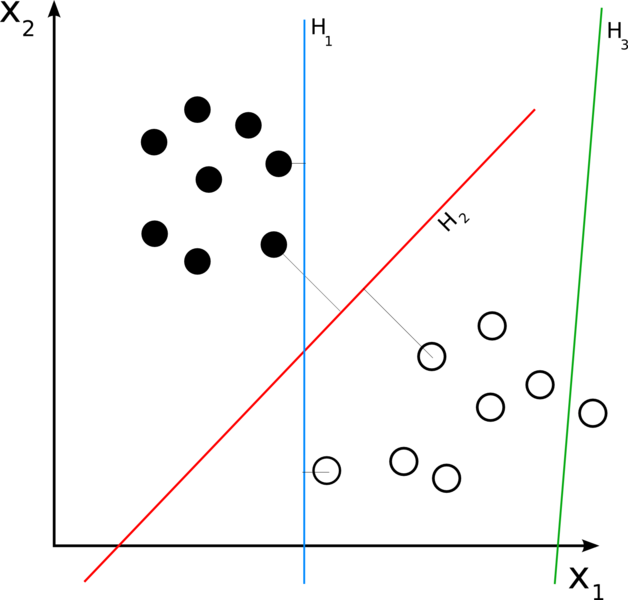

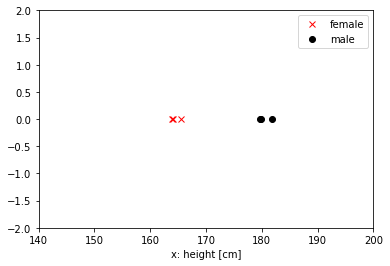

In [11]:
# We plot points from two classes (Male and Female) observed by their height
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel('x: height [cm]')
plt.axis([140,200,-2,2])

# Create for each class three points.
x_1 = np.random.normal(165,1,3) # Measurements from the class 1
x_2 = np.random.normal(180,1,3) # Measurements from the class 2

plt.plot(x_1, np.zeros(len(x_1)), 'rx', label='female')
plt.plot(x_2, np.zeros(len(x_2)), 'ko', label='male')
plt.legend()
plt.show()

We only have one dimensional measurement $x$ and no $y$. However, we may define that the output value for class 1 should be $y=-1$ and the output value for class is $y=+1$.

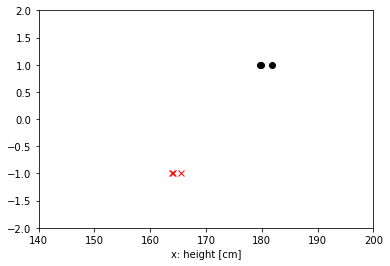

In [17]:
# Add y values that describe the class 
plt.xlabel('x: height [cm]')
plt.axis([140, 200, -2, 2])

y_1 = -np.ones(len(x_1))
y_2 = +np.ones(len(x_2))

plt.plot(x_1, y_1, 'rx')
plt.plot(x_2, y_2, 'ko')
plt.show()

If we now define a line that goes through the mean values of each set of points, $\mu_1 = mean((x_1,y_1))$ and $\mu_2 = mean((x_2,y_2)$ and fit a line through these points we get a *linear discriminator* such that
\begin{equation}
class~=~ \begin{cases}
1, & \text{if } y < 0\\
2, & \text{if } y > 0
\end{cases}
\end{equation}

164.51590077187737
215.24569139834907
a = 0.04 b = -7.49
Discriminator point 189.880796


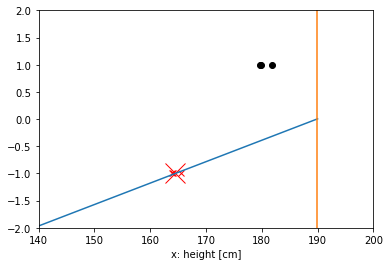

In [37]:
# We "learn" a line that goes through the means of the two classes
plt.xlabel('x: height [cm]')
plt.axis([140,200,-2,2])
plt.plot(x_1,y_1,'rx')
plt.plot(x_2,y_2,'ko')

mu_x1 = np.mean(x_1)
print(mu_x1)
mu_x2 =  np.mean(x_2)
print(mu_x2)
mu_y1 = np.mean(y_1)
mu_y2 = np.mean(y_2)

plt.plot(mu_x1, mu_y1, 'rx', linewidth=2, markersize=20)
plt.plot(mu_x2, mu_y2, 'kx', linewidth=0.5, markersize=20)

# Use the two point formulas
a = (mu_y2 - mu_y1) / (mu_x2 - mu_x1)
b = mu_y1 - a * mu_x1
x = np.arange(100,200,10)
y = a* x + b
print("a = %2.2f b = %2.2f" %(a,b))
plt.plot(x,y)

# Discriminator (y=0)
x_D = -b/a
print('Discriminator point %f' %x_D)
plt.plot([x_D ,x_D],[-2, +2])

plt.show()

In [32]:
# Let's calculate the outputs and errors
y_p = a*x_2+b
print("x=")
print(x_2)
print("True y=")
print(y_2)
print("Predicted y")
print(y_p)
res = y_2-y_p
print('Residuals:')
print(res)
mae = sum(abs(res))/len(res)
print('Mean Absolute Error (MAE): %f' %mae)
mse = np.sqrt(sum((res)**2))/len(res)
print('Mean Squared Error (MSE): %f' %mse)

x=
[181.87264864 179.90483454 179.69666521 250.         250.        ]
True y=
[1. 1. 1. 1. 1.]
Predicted y
[-0.20707298 -0.29697075 -0.30648077  2.90526225  2.90526225]
Residuals:
[ 1.20707298  1.29697075  1.30648077 -1.90526225 -1.90526225]
Mean Absolute Error (MAE): 1.524210
Mean Squared Error (MSE): 0.695876


**We have implemented a linear classifier!!**

**BUT**, is there some problems?

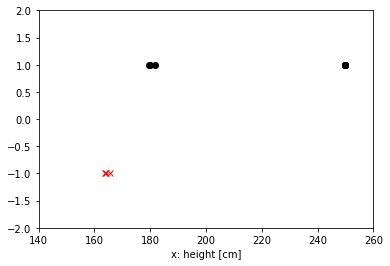

In [41]:
# Class points with one outlier
plt.xlabel('x: height [cm]')
plt.axis([140,260,-2,2])

# Let's add an outlier
x_2 = np.append(x_2, 250)
y_2 = np.append(y_2, +1)
plt.plot(x_1,y_1,'rx')
plt.plot(x_2,y_2,'ko')
plt.show()

164.51590077187737
220.21059262715633
a=0.04 b=-7.49
192.36324669951685


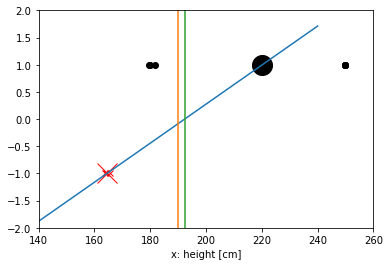

In [42]:
# Let's see the classification results with the outlier
plt.xlabel('x: height [cm]')
plt.axis([140,260,-2,2])
plt.plot(x_1,y_1,'rx')
plt.plot(x_2,y_2,'ko')

mu_x1 = np.mean(x_1)
print(mu_x1)
mu_x2 =  np.mean(x_2)
print(mu_x2)
mu_y1 = np.mean(y_1)
mu_y2 = np.mean(y_2)

plt.plot(mu_x1, mu_y1, 'rx', linewidth=2, markersize=20)
plt.plot(mu_x2, mu_y2, 'ko', linewidth=2, markersize=20)

a_2 = (mu_y2 - mu_y1) / (mu_x2 - mu_x1)
b_2 = mu_y1 - a_2 * mu_x1
x = np.arange(100, 250, 10)
y = a_2 * x + b_2
print("a=%2.2f b=%2.2f" %(a,b))
plt.plot(x,y)

# Discriminator (y=0)
plt.plot([x_D,x_D],[-2,+2])
x_D_2 = -b_2/a_2
print(x_D_2)
plt.plot([x_D_2,x_D_2],[-2,+2])

plt.show()

In [43]:
# Let's calculate the errors for the model with outlier
y_p = a_2*x_2+b_2
print("x=")
print(x_2)
print("True y=")
print(y_2)
print("Predicted y")
print(y_p)
res = y_2-y_p
print('Residuals:')
print(res)
mae = sum(abs(res))/len(res)
print('Mean Absolute Error (MAE): %f' %mae)
mse = np.sqrt(sum((res)**2))/len(res)
print('Mean Squared Error (MSE): %f' %mse)

x=
[181.87264864 179.90483454 179.69666521 250.         250.
 250.         250.        ]
True y=
[1. 1. 1. 1. 1. 1. 1.]
Predicted y
[-0.37671806 -0.44738239 -0.45485776  2.06973955  2.06973955  2.06973955
  2.06973955]
Residuals:
[ 1.37671806  1.44738239  1.45485776 -1.06973955 -1.06973955 -1.06973955
 -1.06973955]
Mean Absolute Error (MAE): 1.222559
Mean Squared Error (MSE): 0.466954


The problem is that in classification the error is discrete, not continuous. For example, for misclassification the error is 1.0 and for correct classification the error is 0.0. It does not matter how far on the correct or wrong side the sample is, it only matters that it is on the correct side. Therefore we need to have a discrete mapping $f(\cdot)$ of $y=ax+b$ so that 
\begin{equation}
f(ax+b) ~=~ \begin{cases}
-1, \hbox{if } ax+b < 0\\
+1, \hbox{if } ax+b > 0
\end{cases}
\end{equation}

We will get back to this!!

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 4.
